1. KNOW YOUR DATA

Project Name
 "Yes Bank Stock Closing Price Prediction - EDA"


Project Summary
This project performs Exploratory Data Analysis (EDA) on Yes Bank stock data.
The goal is to understand relationships between stock features (Open, High, Low)
and the target variable (Close price).


GitHub Link


In [ ]:
github_link = "https://github.com/radhalahariala3-del/yes-bank-project.gitprint("GitHub:", github_link)


Problem Statement

The objective is to analyze Yes Bank stock price data and understand patterns
in stock movement using EDA techniques before building machine learning models.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import files
uploaded = files.upload()

Saving data_YesBank_StockPrices (1).csv to data_YesBank_StockPrices (1) (1).csv


In [5]:
# Load dataset
df = pd.read_csv("data_YesBank_StockPrices (1).csv")
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
# Dataset shape
df.shape


(185, 5)

In [7]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
# Missing values
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0


In [9]:
# Duplicate values
df.duplicated().sum()


np.int64(0)

2. UNDERSTANDING YOUR VARIABLES

In [10]:
df.describe()


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [12]:
# Convert Date column properly (Mon-Year format)

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Drop original Date
df.drop('Date', axis=1, inplace=True)

df.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11


In [13]:
# Unique values
for col in df.columns:
    print(col, df[col].nunique())


Open 183
High 184
Low 183
Close 185
Year 16
Month 12


DATA WRANGLING

In [14]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [15]:
# Remove duplicates
df.drop_duplicates(inplace=True)


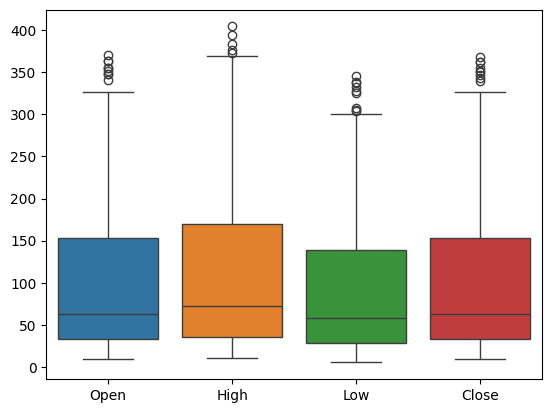

In [16]:
# Outlier check
sns.boxplot(data=df[['Open','High','Low','Close']])
plt.show()


4. DATA VISUALIZATION & STORYTELLING

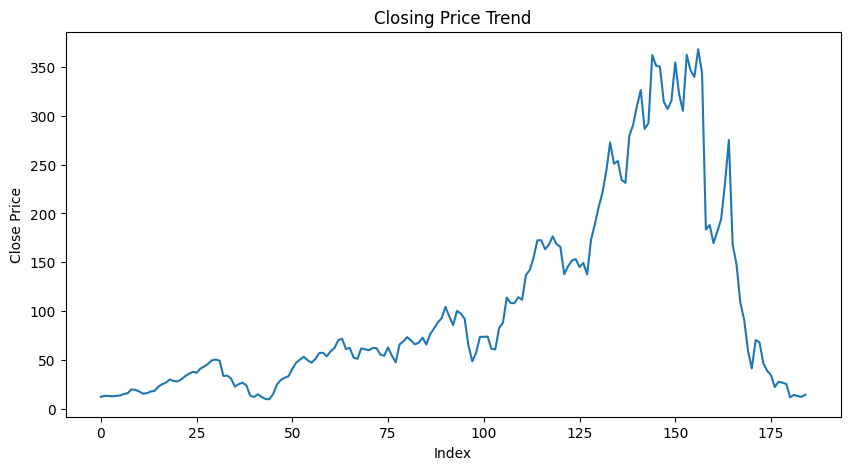

In [18]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title("Closing Price Trend")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()


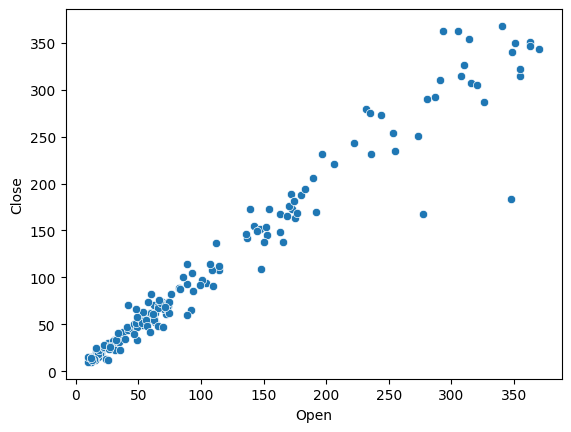

In [19]:
sns.scatterplot(x='Open', y='Close', data=df)
plt.show()


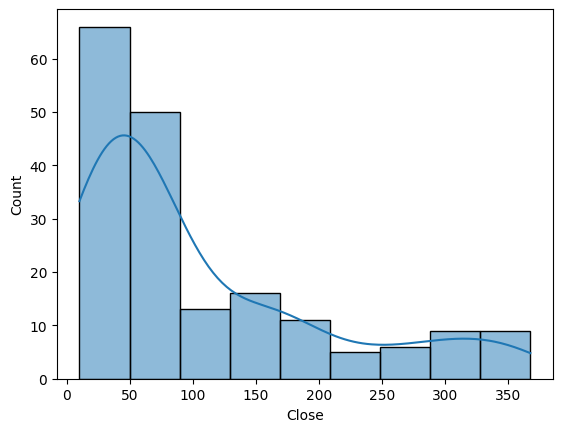

In [20]:
sns.histplot(df['Close'], kde=True)
plt.show()


In [22]:
if 'Date' in df.columns:
    df_clean = df.drop('Date', axis=1)
else:
    df_clean = df.copy()

df_clean.head()

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11


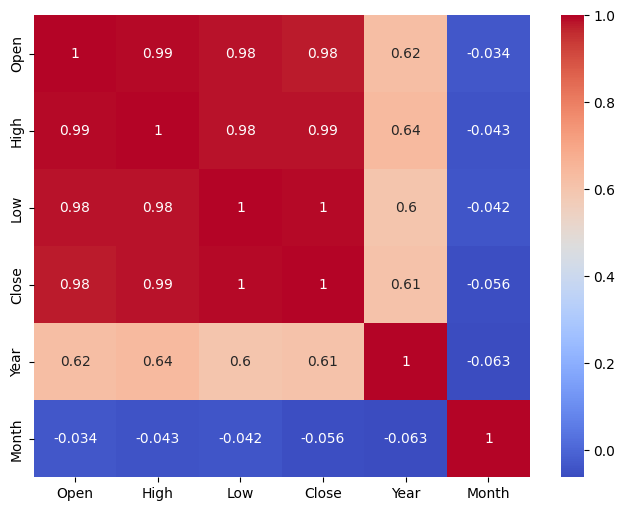

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

HYPOTHESIS

In [24]:
# Example hypothesis comments (write in markdown)
"""
1. Open price strongly affects Close price.
2. High and Low prices correlate with Close.
3. Stock trend changes over time.
"""


'\n1. Open price strongly affects Close price.\n2. High and Low prices correlate with Close.\n3. Stock trend changes over time.\n'

FEATURE ENGINEERING & PREPROCESSING

In [25]:
X = df_clean.drop('Close', axis=1)
y = df_clean['Close']


In [26]:
# Feature scaling (optional but good practice)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


DATA SPLITTING

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


ML MODEL IMPLEMENTATION

Model 1 — Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("R2:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


R2: 0.9907046745006218
MSE: 84.01889739942449


Model 2 — Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


R2: 0.9789740809189987
MSE: 190.04977696729665


Model 3 — XGBoost (Strong model)

In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("R2:", r2_score(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))


R2: 0.9752878034111738
MSE: 223.36942475547463


HYPERPARAMETER TUNING

In [31]:
params = {
    'n_estimators':[100,200],
    'max_depth':[None,10,20]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    params,
    cv=3,
    scoring='r2'
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 10, 'n_estimators': 100}


FINAL MODEL SELECTION

In [32]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Final R2:", r2_score(y_test, y_pred_best))


Final R2: 0.9789507602805085


SAVE MODEL

In [33]:
import joblib

joblib.dump(best_model, "yesbank_model.pkl")


['yesbank_model.pkl']

LOAD MODEL & SANITY CHECK

In [34]:
loaded_model = joblib.load("yesbank_model.pkl")

sample_pred = loaded_model.predict(X_test[:5])

print(sample_pred)


[ 32.0563      12.40348333 344.8118     114.5433     315.1162    ]


CONCLUSION


Conclusion:

1. Multiple regression models were implemented.
2. Random Forest after tuning performed best.
3. Open, High, Low are strongly correlated with Close price.
4. Model can be used for future stock prediction with limitations.

